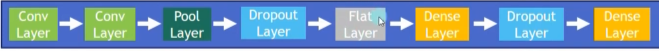

Mnist 데이터 불러오기 및 정규화

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D

#데이터 불러오기
(x_train, y_train), (x_test,y_test) = mnist.load_data()

#텐서로 변환
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape,x_test.shape)
print(y_train.shape, y_test.shape)

#정규화
x_train = x_train.astype(np.float32)/255.
x_test = x_test.astype(np.float32)/255.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


CNN 모델 구축

In [4]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25)) #오버피팅 방지

#3차원 텐서를 1차원 벡터로 변환
cnn.add(Flatten())

#은닉충
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))

#출력층
cnn.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CNN 모델 컴파일 및 학습

In [5]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

hist= cnn.fit(x_train, y_train, batch_size = 128, epochs=30, validation_data=(x_test,y_test))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.8523 - loss: 0.4729 - val_accuracy: 0.9843 - val_loss: 0.0470
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9741 - loss: 0.0850 - val_accuracy: 0.9885 - val_loss: 0.0372
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9796 - loss: 0.0683 - val_accuracy: 0.9890 - val_loss: 0.0320
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9851 - loss: 0.0492 - val_accuracy: 0.9899 - val_loss: 0.0322
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9870 - loss: 0.0426 - val_accuracy: 0.9904 - val_loss: 0.0300
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9884 - loss: 0.0393 - val_accuracy: 0.9923 - val_loss: 0.0269
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9888 - loss: 0.0335 - val_accuracy: 0.9916 - val_loss: 0.0293
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9900 - loss: 0.0318 - val_accuracy:

모델 (정확도) 평가

In [6]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9908 - loss: 0.0424


[0.0359121672809124, 0.9923999905586243]

정확도 및 손실

<function matplotlib.pyplot.show(close=None, block=None)>

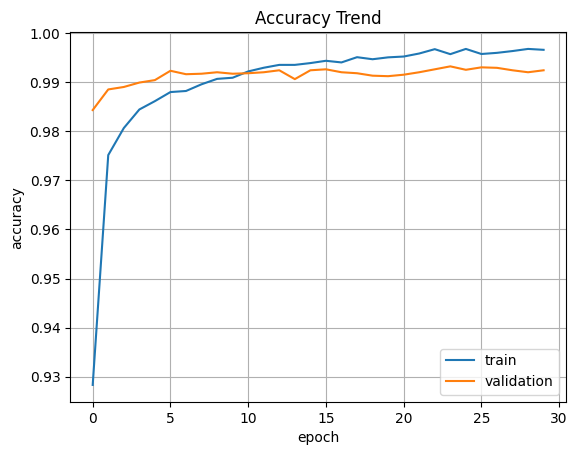

In [7]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

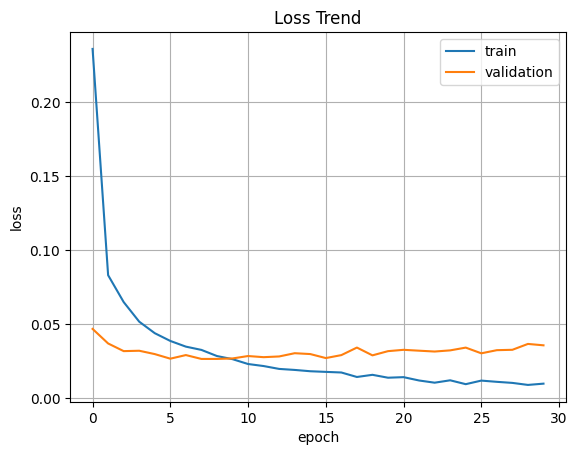

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show